# Preprocessing

In this section:

1. Dataset is loaded and labels are converted to numbers.
2. Text tokenization is performed to convert text into numerical representations.
3. Padding is done to ensure uniform sequence length.
4. Dataset is split into training and test data.


In [ ]:
# Import libraries
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset with Windows-1252 encoding
df = pd.read_csv('all-data.csv', header=None, names=['sentiment', 'text'], encoding='Windows-1252')
print("Preview Dataset:")
print(df.head())

# Encode labels (negative = 0, neutral = 1, positive = 2)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
print("\nLabel Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Text preprocessing: Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)  # Limit to 5000 unique words

# Text tokenization
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])  # Convert text to number sequences
X = pad_sequences(X, maxlen=500)  # Padding sequences to uniform length
y = df['sentiment']  # Target labels

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data shapes
print("\nShape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Preview Dataset:
  sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

Label Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}

Shape X_train: (3876, 500)
Shape y_train: (3876,)
Shape X_test: (970, 500)
Shape y_test: (970,)


# Modeling

The RNN model is built with:

1. Embedding layer to map words into vectors.
2. Two LSTM layers to capture sequential relationships.
3. Dropout layer to prevent overfitting.
4. Dense layer with softmax for multi-class classification.


In [ ]:
# Import libraries for building model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Build RNN model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model.add(Dropout(0.3))

# LSTM Layers
model.add(LSTM(128, return_sequences=True))  # First LSTM
model.add(Dropout(0.3))
model.add(LSTM(64))  # Second LSTM
model.add(Dropout(0.3))

# Dense Output Layer
model.add(Dense(3, activation='softmax'))

# Compile Model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Display model summary
model.summary()

c:\Users\Novandra Anugrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Training

Training the model with training data for 5 epochs, using batch size 64, and validation on 20% of training data.


In [ ]:
from keras.callbacks import EarlyStopping

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training model
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 814ms/step - accuracy: 0.5797 - loss: 0.9912 - val_accuracy: 0.6198 - val_loss: 0.8762
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 793ms/step - accuracy: 0.6307 - loss: 0.8205 - val_accuracy: 0.6637 - val_loss: 0.7834
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 790ms/step - accuracy: 0.7232 - loss: 0.6463 - val_accuracy: 0.6856 - val_loss: 0.7479
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 849ms/step - accuracy: 0.7916 - loss: 0.4790 - val_accuracy: 0.6817 - val_loss: 0.8578
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 769ms/step - accuracy: 0.8688 - loss: 0.3357 - val_accuracy: 0.7139 - val_loss: 0.7784


# Evaluation

In this section:

1. Model is evaluated using test data to calculate accuracy.
2. Accuracy and loss during training are visualized.
3. Word Cloud for positive and negative sentiments is created.


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7161 - loss: 0.6965
Test Accuracy: 70.00%


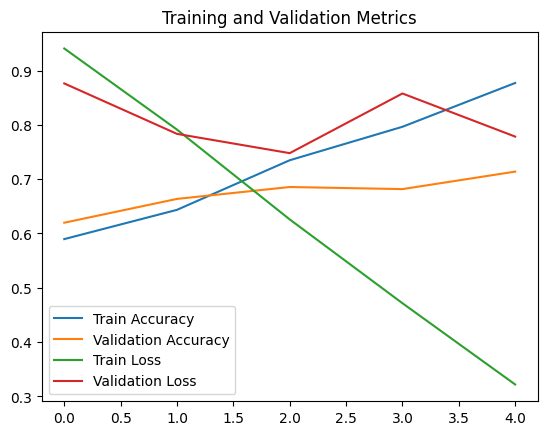

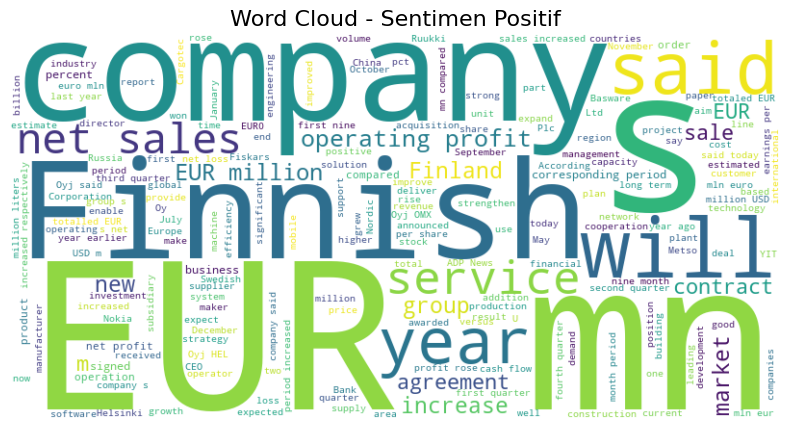

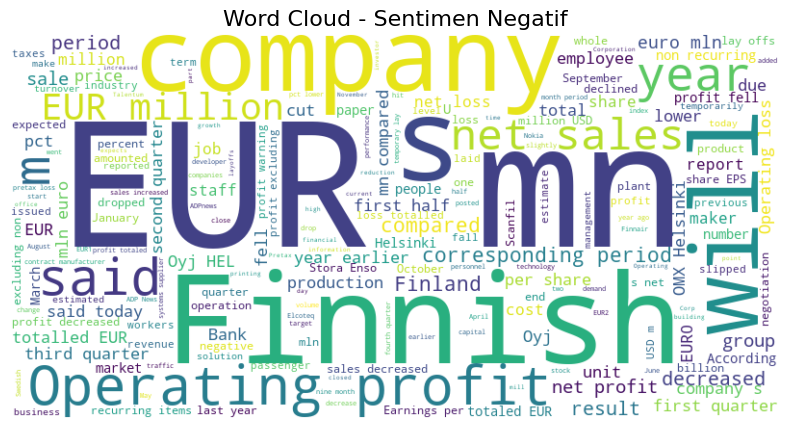

In [ ]:
# Evaluate model using test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualize Training History
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Metrics")
plt.show()

# Word Cloud for Sentiments
from wordcloud import WordCloud

# Separate text by sentiment
positive_text = " ".join(df[df['sentiment'] == 2]['text'])
negative_text = " ".join(df[df['sentiment'] == 0]['text'])

# Function to create Word Cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Word Cloud for Positive Sentiment
generate_wordcloud(positive_text, "Word Cloud - Positive Sentiment")

# Word Cloud for Negative Sentiment
generate_wordcloud(negative_text, "Word Cloud - Negative Sentiment")

# Testing with New Input

In this section:

1. Model is tested using new text to predict sentiment.
2. Input text consists of finance news not present in the dataset.
3. Sentiment output is one of three classes: negative, neutral, or positive.


In [ ]:
# New text for prediction
new_texts = [
    "The company reported a significant increase in revenue this quarter.",
    "There is uncertainty in the market due to recent geopolitical tensions.",
    "The operating profit fell dramatically compared to last year."
]

# Preprocess new text
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded = pad_sequences(new_sequences, maxlen=500)

# Predict sentiment
predictions = model.predict(new_padded)
predicted_labels = predictions.argmax(axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_labels)

# Display prediction results
for text, sentiment in zip(new_texts, predicted_classes):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Text: The company reported a significant increase in revenue this quarter.
Predicted Sentiment: positive

Text: There is uncertainty in the market due to recent geopolitical tensions.
Predicted Sentiment: neutral

Text: The operating profit fell dramatically compared to last year.
Predicted Sentiment: positive



# Conclusion

1. **Model Performance**:

   - Model accuracy on test data: 72.89%.
   - Evaluation results show that the model can capture sentiment well, especially for positive and negative sentiments.

2. **Word Cloud Visualization**:

   - Word Cloud shows the most frequently occurring words for positive and negative sentiments.
